# Customer Churn Prediction

## Part 1 - DEFINE

## ---- 1 Define the problem ----    

Customer retention is one of the primary growth pillars for products with a subscription-based business model.   

Competition is tough in the SaaS market where customers are free to choose from plenty of providers even within one product category. Several bad experiences – or even one – and a customer may quit.

If we can create a model that can do a great job predicting customer churn, then we can significantly reduce lost revenue and acquisition spend.

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
sns.set(style='dark')

# My info here
__author__ = "Sha Brown"
__email__ = "sha821@gmail.com"

# Part 2 - DISCOVER

## ---- 2 Load the data ----

In [2]:
# Load the data into a Pandas dataframe
customer_df = pd.read_csv('customer_churn.csv')

In [3]:
# Display the shape of the dataframe
customer_df.shape

(900, 10)

In [4]:
# Display the first 5 rows
customer_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.00,"11,066.80",0,7.22,8.00,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.00,"11,916.22",0,6.50,11.00,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.00,"12,884.75",0,6.67,12.00,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.00,"8,010.76",0,6.71,10.00,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.00,"9,191.58",0,5.56,9.00,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
# Show the summary statistics of the dataframe
customer_df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.00,900.00,900.00,900.00,900.00,900.00
mean,41.82,"10,062.82",0.48,5.27,8.59,0.17
std,6.13,"2,408.64",0.50,1.27,1.76,0.37
min,22.00,100.00,0.00,1.00,3.00,0.00
25%,38.00,"8,497.12",0.00,4.45,7.00,0.00
50%,42.00,"10,045.87",0.00,5.21,8.00,0.00
75%,46.00,"11,760.10",1.00,6.11,10.00,0.00
max,65.00,"18,026.01",1.00,9.15,14.00,1.00


## ---- 3 Check the quality of the data ----

In [6]:
# check to see if there are duplicated entries
customer_df.duplicated().sum()

0

In [7]:
# check to see if there are null values
customer_df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

## ---- 4 Data Processing ----

### Process 'Location'

In [8]:
def extract_state(string):
    if string[-5] == '-':
        state = string[-13:-11]
    else:
        state = string[-8:-6]
    return state

In [9]:
customer_df['State'] = customer_df['Location'].apply(extract_state)

In [10]:
churn_by_state = pd.DataFrame(customer_df.groupby('State')['Churn'].mean().sort_values(ascending=False))
churn_by_state

,Churn
State,
MH,0.44
WY,0.43
NJ,0.38
AS,0.36
DE,0.36
LA,0.29
RI,0.29
CO,0.27
MI,0.27


## ---- 5 Explore the data (EDA) ----

### Visualize feature and target variables

In [11]:
def plot_box_dist(df, col):
    ''' 
    Makes boxplot and distribution plot side by side.
    
    Args:
    
    df(dataframe): pandas dataframe
    col(str): column name
    
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[col], orient='v')
    plt.subplot(1,2,2)
    sns.distplot(df[col], bins=20)

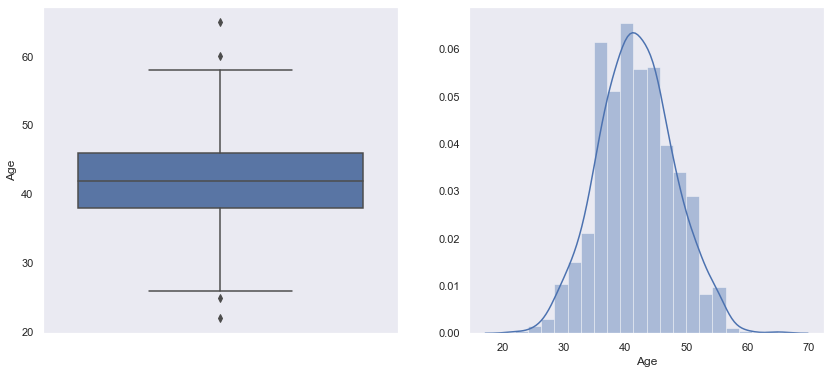

In [12]:
plot_box_dist(customer_df, 'Age')

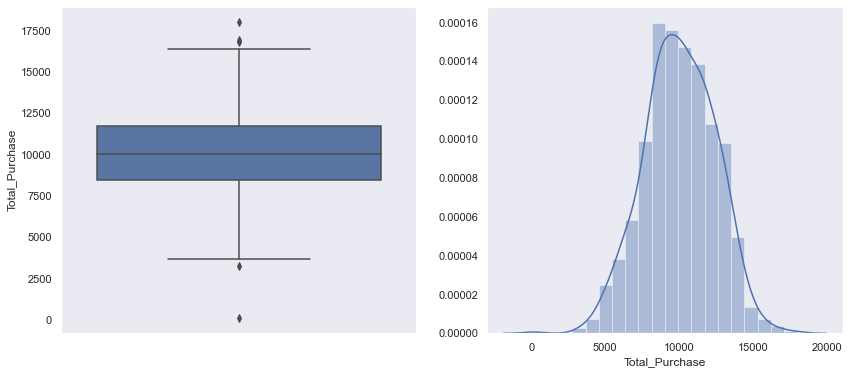

In [13]:
plot_box_dist(customer_df, 'Total_Purchase')

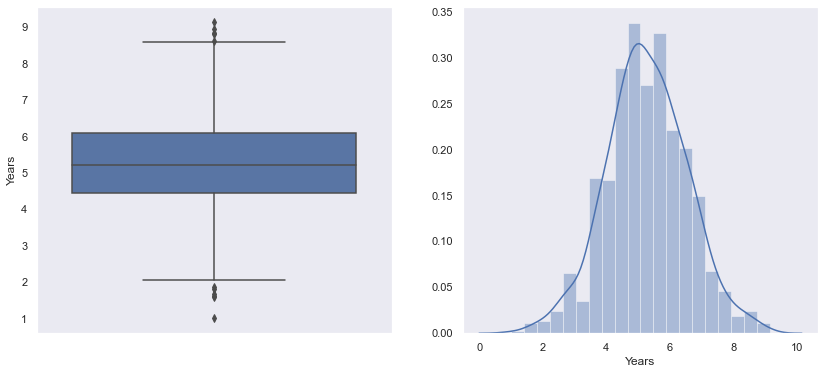

In [14]:
plot_box_dist(customer_df, 'Years')

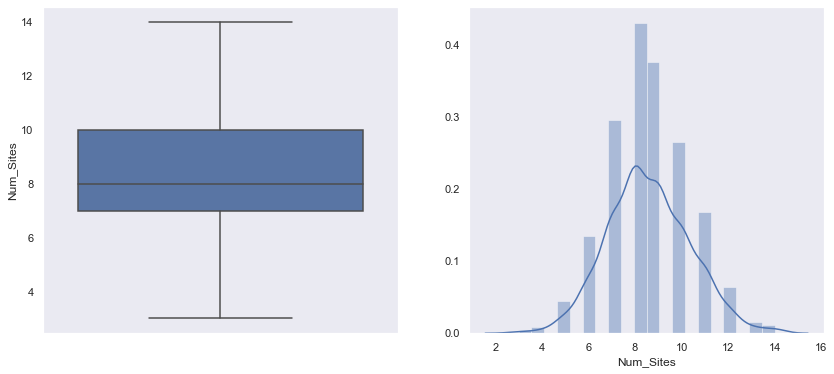

In [15]:
plot_box_dist(customer_df, 'Num_Sites')

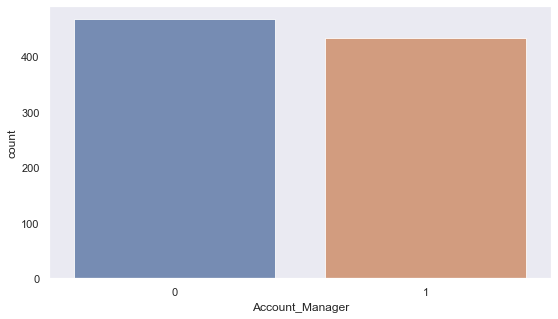

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(customer_df['Account_Manager'], alpha=0.8)

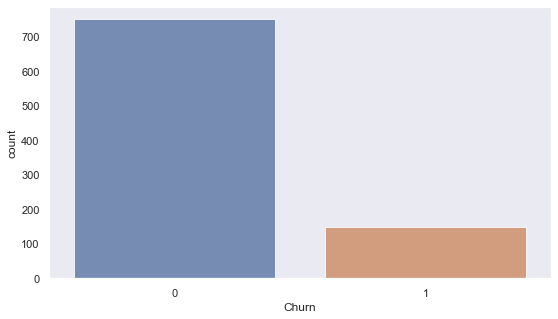

In [17]:
plt.figure(figsize=(9,5))
sns.countplot(customer_df['Churn'], alpha=0.8)

### Visualize the relationship between feature and target variables

In [18]:
left_df = customer_df[customer_df['Churn'] == 1] # create a dataframe with churn customers
stayed_df = customer_df[customer_df['Churn'] == 0] # create a dataframe with customers who stayed

In [19]:
print('The proportion of churned customers:')
print(round(len(left_df)/len(customer_df), 2))
print('The proportion of customers who stayed:')
print(round(len(stayed_df)/len(customer_df),2))

The proportion of churned customers:
0.17
The proportion of customers who stayed:
0.83


In [20]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 
def create_two_kdeplots(df, col):
    ''' 
    Makes two kdeplots stacked on one another.
    
    Args:
    
    df(dataframe): pandas dataframe
    col(str): column name
    
    '''
    plt.figure(figsize=(12,7))

    sns.kdeplot(left_df[col], label = 'Customers who left', shade = True, color = 'r')
    sns.kdeplot(stayed_df[col], label = 'Customers who Stayed', shade = True, color = 'b')

    plt.xlabel(col)

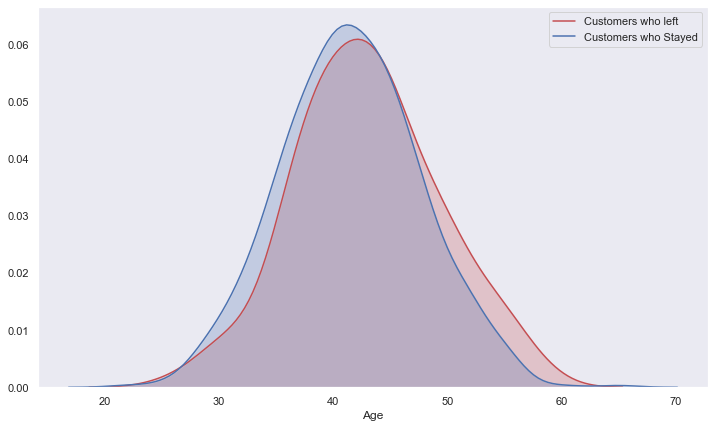

In [21]:
create_two_kdeplots(customer_df, 'Age')

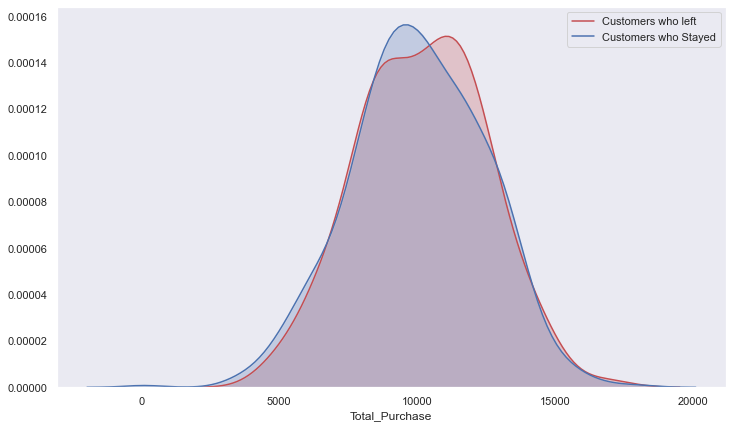

In [22]:
create_two_kdeplots(customer_df, 'Total_Purchase')

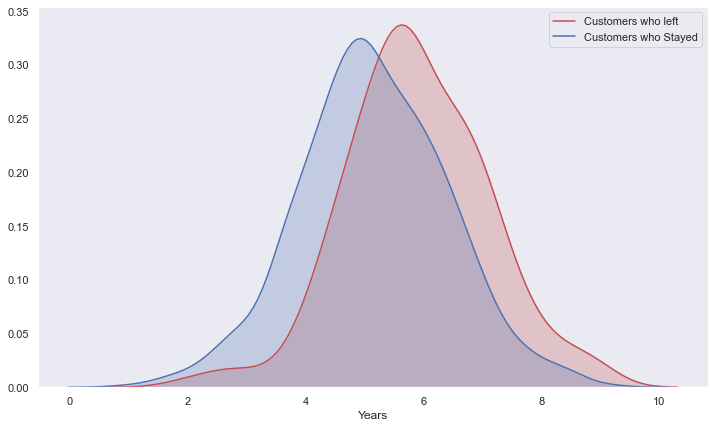

In [23]:
create_two_kdeplots(customer_df, 'Years')

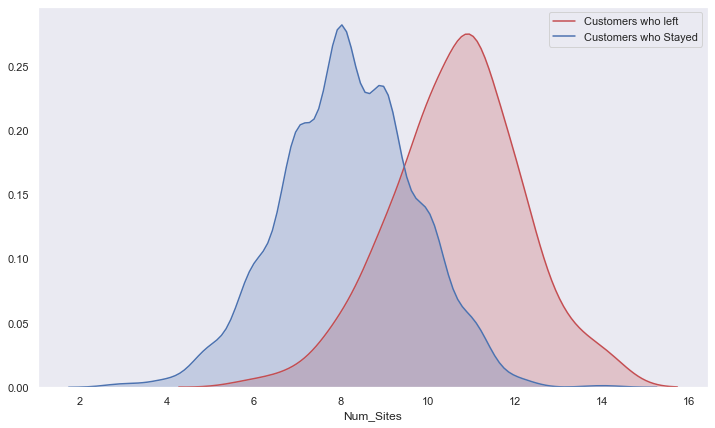

In [24]:
create_two_kdeplots(customer_df, 'Num_Sites')

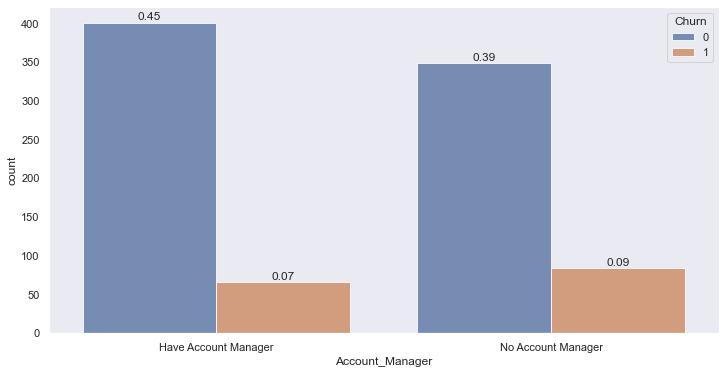

In [25]:
plt.figure(figsize=(12,6))
x_labels = ['Have Account Manager', 'No Account Manager']
ax = sns.countplot(x='Account_Manager', hue='Churn',
                   data=customer_df, alpha=0.8)
ax.set_xticklabels(x_labels)
total = len(customer_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

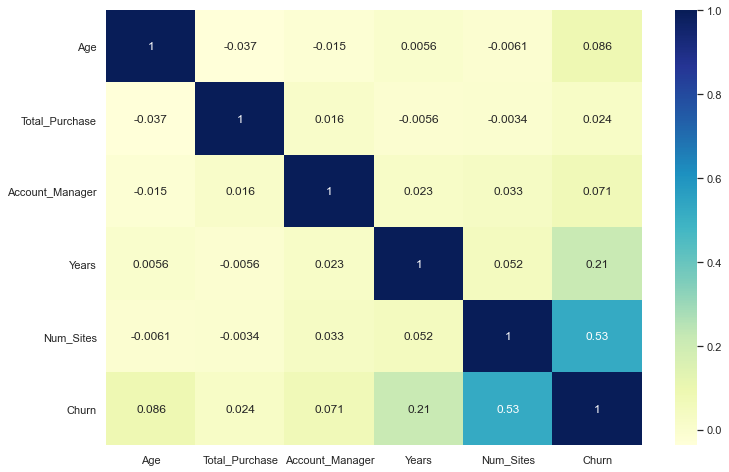

In [26]:
# plot a heatmap
correlations = customer_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlations, annot = True, cmap="YlGnBu")

## Survival Analysis

In [33]:
from lifelines import KaplanMeierFitter

In [34]:
kmf = KaplanMeierFitter()

In [38]:
T = customer_df['Years']
T.head()

0   7.22
1   6.50
2   6.67
3   6.71
4   5.56
Name: Years, dtype: float64

In [40]:
C = customer_df['Churn']
C.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [41]:
kmf.fit(T, C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 900 total observations, 750 right-censored observations>

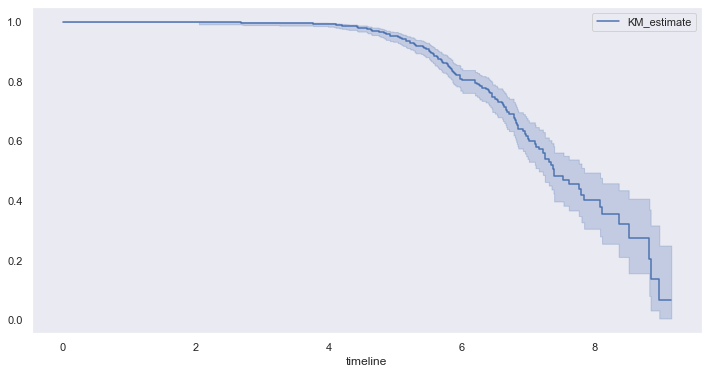

In [42]:
plt.figure(figsize=(12, 6))
kmf.plot()

In [64]:
# Partition the Num_Sites into 5 buckets

customer_df['site_bins'] = pd.cut(x=customer_df['Num_Sites'], 
                                  bins=[0, 6, 12, 20], 
                                  labels=['1 to 6 sites', 
                                          '7 to 12 sites', 
                                          '13 to 20 sites']
                                  ) 

In [65]:
customer_df.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,site_bins
0,Cameron Williams,42.00,"11,066.80",0,7.22,8.00,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,AK,7 to 12 sites
1,Kevin Mueller,41.00,"11,916.22",0,6.50,11.00,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,RI,7 to 12 sites


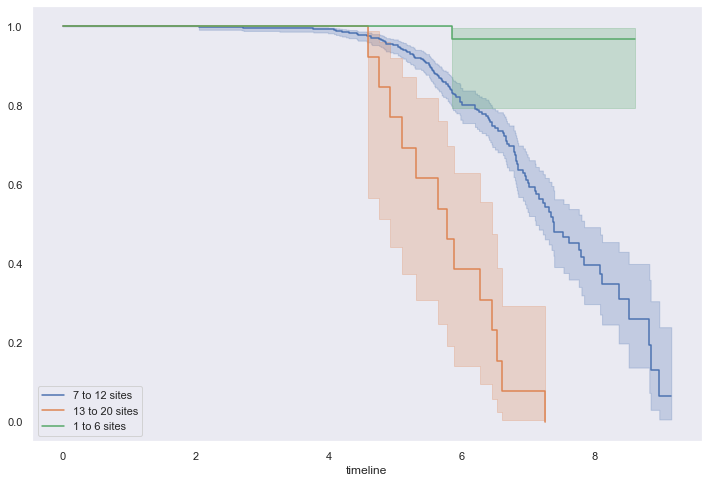

In [66]:
plt.figure(figsize=(12,8))

for site in customer_df['site_bins'].unique():
    ix = customer_df['site_bins'] == site
    kmf.fit(T.loc[ix], C.loc[ix], label=site)
    kmf.plot()

In [58]:
ix = customer_df['site_bins'] == '1 to 5 sites'
ix.value_counts()

False    872
True      28
Name: site_bins, dtype: int64

# ---- 6 Establish a baseline ----
Since this is a project to predict numeric values. We will establish a baseline with a simple logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
features = customer_df.drop(columns=['Names', 'Onboard_date', 'Company','Location', 'Churn', 'State']).copy()
target = customer_df['Churn'].copy()


In [ ]:
feat_train, feat_test, target_train, target_test = train_test_split(features, target,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    shuffle=True
                                                                    )

In [ ]:
feat_train.head()

In [ ]:
lr = LogisticRegression(penalty='l2', random_state=42,
                        verbose=2, n_jobs=-1)

In [ ]:
lr.fit(feat_train, target_train)

In [ ]:
lr_predictions = lr.predict(feat_test)

In [ ]:
def print_metrics(y_true, y_pred, model_name):
    """Print machine learning metrics.
       
       Args:
    
       y_true(1d array): Ground truth (correct) labels.
       y_pred(1d array): Predicted labels.
       model_name(string): the name of the model
    """
    print(f'-----{model_name}-----')
    print('\n')
    print(f'Accuracy score is: {accuracy_score(y_true, y_pred):2.2f}')
    print(f'Precision score is: {precision_score(y_true, y_pred):2.2f}')
    print(f'Recall score is: {recall_score(y_true, y_pred):2.2f}')
    print(f'F1 score is: {f1_score(y_true, y_pred):2.2f}')

In [ ]:
print_metrics(target_test, lr_predictions, 'Logistic Regression')

## ---- 6 Hypothesize solution ----

There is still a lot of room to improve the performance:

1. During the exploratory analysis, we have noticed some variables have outliers. We can choose models which are robust to outliers such as random forest, XGboost.

2. We can scale numerical variables.

3. Create a new feature using different variables.

4. It also makes sense that customers who have similar background/behavior may have similar action. So we will also test KNearest Neighbor.

5. Resample the less common label to balance the dataset.

# Part 3 - DEVELOP
## ---- 7 Feature Engineering ----

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = customer_df[customer_df['Churn']==0]
df_minority = customer_df[customer_df['Churn']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=747,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
customer_df = pd.concat([df_majority, df_minority_upsampled]).copy()
 

In [ ]:
state_churn_mean = customer_df.groupby('State')['Churn'].mean().to_dict()

customer_df['state_churn'] = customer_df['State'].map(state_churn_mean)

In [ ]:
customer_df.head(2)

In [ ]:
# Create a new feature using Total_Purchase divided by years

customer_df['purchase_per_year'] = customer_df['Total_Purchase']/customer_df['Years']

In [ ]:
# Create a new feature using Num_Sites divided by years

customer_df['sites_per_year'] = customer_df['Num_Sites']/customer_df['Years']

In [ ]:
# Create a new feature using Total_purchase divided by sites

customer_df['purchase_per_site'] = customer_df['Total_Purchase']/customer_df['Num_Sites']

In [ ]:
customer_df.head(2)

In [ ]:
customer_df.columns = customer_df.columns.str.lower()

In [ ]:
correlations = customer_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlations, annot = True, cmap="YlGnBu")

In [ ]:
customer_cleaned = customer_df.drop(columns=['names', 'onboard_date', 'company','location', 'state_churn'])
customer_cleaned.to_csv('customer_cleaned.csv', index=False)

In [ ]:
features = customer_df.drop(columns=['names', 'onboard_date', 'company','location', 'churn', 'state']).copy()
target = customer_df['churn'].copy()

In [ ]:
feat_train, feat_test, target_train, target_test = train_test_split(features, target,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    stratify=target
                                                                    )

In [ ]:
feat_train.head(2)

In [ ]:
feat_test.head(2)

In [ ]:
target_train.mean()

In [ ]:
target_test.mean()

In [ ]:
#ss = StandardScaler()
#feat_train = ss.fit_transform(feat_train)
#feat_test = ss.transform(feat_test)

In [ ]:
def select_model(train_X, train_y):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=42),
            "hyperparameters":
                {
                    "n_estimators": [100],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
        {
            "name": "LGBMClassifier",
            "estimator": LGBMClassifier(random_state=42),
            "hyperparameters":
                {
                    'learning_rate': [0.005, 0.01, 0.1],
                    'n_estimators': [40],
                    'num_leaves': [6,8,12,16],
                    'boosting_type' : ['gbdt'],
                    'objective' : ['binary'],
                    'random_state' : [42], # Updated from 'seed'
                    'colsample_bytree' : [0.65, 0.66],
                    'subsample' : [0.7,0.75],
                    'reg_alpha' : [1,1.2],
                    'reg_lambda' : [1,1.2,1.4]
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='f1',
                            cv=5)
        grid.fit(train_X, train_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}".format(model["best_params"]))
        print("Best Estimator: {}".format(model['best_model']))

    return models


In [ ]:
result = select_model(feat_train, target_train)

In [ ]:
best_model = RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)

In [ ]:
best_model.fit(feat_train, target_train)

In [ ]:
rfc_preds = best_model.predict(feat_test)

In [ ]:
print_metrics(target_test, rfc_preds, 'Random Forest Classifier')

In [ ]:
def plot_importance(model, train_X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':train_X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_importance(best_model, features)

In [ ]:
## Save trained model to a pickle file

import pickle
pickle.dump(best_model, open('churn_rfc.pkl', 'wb'))